# MODEL EVALUATION

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# fetching data from the system using pandas library.
general_data=pd.read_csv(r"D:\User Data\Desktop\nishant\foxmula\1.hr-analytics-case-study\general_data.csv")

In [2]:
#Removing the null values in dataset.
a=general_data.NumCompaniesWorked.median()
b=general_data.TotalWorkingYears.median()
general_data.NumCompaniesWorked=general_data.NumCompaniesWorked.fillna(a)
general_data.TotalWorkingYears=general_data.TotalWorkingYears.fillna(b)


In [3]:
# convert categorical data to numerical value.
general_data=pd.get_dummies(general_data,columns=['Gender'])
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,JobLevel,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,1,...,23,8,1,6.0,3,5,1,4,1,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,4,...,15,8,3,5.0,2,5,0,3,0,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,3,...,11,8,3,13.0,5,8,7,5,0,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,1,...,12,8,2,9.0,2,6,0,4,0,1


In [4]:
#selecting features for train the model.
input_columns=["Age","Education","JobLevel","MonthlyIncome","DistanceFromHome","PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]
#selecting the targeted feature.
output_column="Attrition"

In [5]:
#shape of training dataset.
x=general_data.loc[:,input_columns]
#shape of test dataset.
y=general_data.loc[:,output_column]
print(x.shape, y.shape)

(4410, 11) (4410,)


In [6]:
#Splitting the dataset in two parts.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=100, stratify=y)

print (x_train.shape)
print (y_train.shape)
# shape of test dataset.
print (x_test.shape)
print (y_test.shape)


(3087, 11)
(3087,)
(1323, 11)
(1323,)


# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(criterion='gini', max_depth=10,random_state=121).fit(x_train,y_train)

In [8]:
print(Dtree.score(x_train,y_train))
print(Dtree.score(x_test,y_test))

0.9164237123420796
0.8798185941043084


In [9]:
predictions=Dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.90      0.96      0.93      1110
         Yes       0.70      0.44      0.54       213

    accuracy                           0.88      1323
   macro avg       0.80      0.70      0.74      1323
weighted avg       0.87      0.88      0.87      1323



In [10]:
Dtree_Conf_Mat=confusion_matrix(y_test,predictions)
print(Dtree_Conf_Mat)

[[1071   39]
 [ 120   93]]


In [11]:
from sklearn.metrics import accuracy_score
Accuracy_Dtree=accuracy_score(y_test,predictions)
print(Accuracy_Dtree)

0.8798185941043084


[Text(0.378173828125, 0.9545454545454546, 'x[6] <= 1.5\ngini = 0.271\nsamples = 3087\nvalue = [2589, 498]'),
 Text(0.154052734375, 0.8636363636363636, 'x[0] <= 33.5\ngini = 0.499\nsamples = 191\nvalue = [92, 99]'),
 Text(0.10498046875, 0.7727272727272727, 'x[3] <= 112610.0\ngini = 0.482\nsamples = 165\nvalue = [67, 98]'),
 Text(0.0458984375, 0.6818181818181818, 'x[3] <= 23140.0\ngini = 0.45\nsamples = 143\nvalue = [49, 94]'),
 Text(0.015625, 0.5909090909090909, 'x[1] <= 2.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.0078125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0234375, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.076171875, 0.5909090909090909, 'x[0] <= 23.5\ngini = 0.422\nsamples = 132\nvalue = [40, 92]'),
 Text(0.0390625, 0.5, 'x[0] <= 18.5\ngini = 0.249\nsamples = 55\nvalue = [8, 47]'),
 Text(0.0234375, 0.4090909090909091, 'x[4] <= 4.0\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.015625, 0.3181818181818182, 'x[5] <= 20.0\ngini =

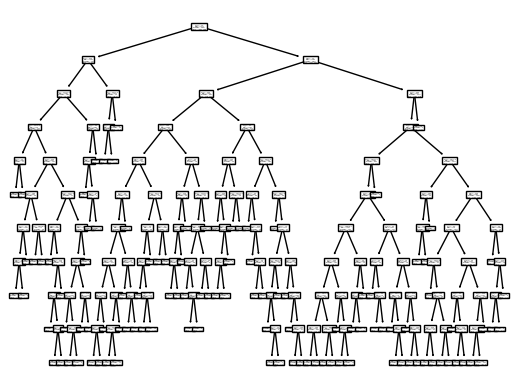

In [12]:
from sklearn import tree
tree.plot_tree(Dtree.fit(x_train,y_train)) 

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=500).fit(x_train,y_train)

In [14]:
print(Rf.score(x_train,y_train))
print(Rf.score(x_test,y_test))

1.0
0.9894179894179894


In [15]:
Rf_predictions= Rf.predict(x_test)
print(classification_report(y_test,Rf_predictions))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1110
         Yes       0.99      0.95      0.97       213

    accuracy                           0.99      1323
   macro avg       0.99      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



In [16]:
Rf_Conf_Mat=confusion_matrix(y_test,Rf_predictions)
print(Rf_Conf_Mat)


[[1107    3]
 [  11  202]]


In [17]:
Accuracy_Rf=accuracy_score(y_test,Rf_predictions)
print(Accuracy_Rf)

0.9894179894179894


# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
logi_reg=LogisticRegression().fit(x_train,y_train)
print(logi_reg.score(x_train,y_train))
print(logi_reg.score(x_test,y_test))

0.8386783284742468
0.8390022675736961


In [19]:
lr_predictions_test=logi_reg.predict(x_test)
lr_predictions_train=logi_reg.predict(x_train)

#print(classification_report(y_test,lr_predictions_test))
#print(classification_report(y_train,lr_predictions_train))

In [20]:
Accuracy_lr_test=accuracy_score(y_test,lr_predictions_test)
Accuracy_lr_train=accuracy_score(y_train,lr_predictions_train)
print(Accuracy_lr_test)
print(Accuracy_lr_train)

0.8390022675736961
0.8386783284742468


In [21]:
from sklearn import svm
SVM = svm.SVC(probability=True)
SVM.fit(x_train,y_train)
train_predict = SVM.predict(x_train)
test_predict = SVM.predict(x_test)


In [22]:
Accuracy_svm_test=accuracy_score(y_test,test_predict)
Accuracy_svm_train=accuracy_score(y_train,train_predict)
print(Accuracy_svm_test)
print(Accuracy_svm_train)

0.8390022675736961
0.8386783284742468


In [23]:
test_Score=[98.7,87.9,83.8,85.5,84.5,50.8]
train_Score=[100,91.6,83.9,100,100,50]
data={"Test Accuracy":test_Score,"Train Accuracy":train_Score}
index=["Random Forest","Decision Tree","Logistic Regression","SVM","KNN","K-Mean Clustering"]

In [24]:
import pandas as pd
Model_eval=pd.DataFrame(data,index)
Model_eval.head(6)

,Test Accuracy,Train Accuracy
Random Forest,98.7,100.0
Decision Tree,87.9,91.6
Logistic Regression,83.8,83.9
SVM,85.5,100.0
KNN,84.5,100.0
K-Mean Clustering,50.8,50.0


In [25]:
import pickle
import pandas as pd
saved_model=pickle.dumps(Rf)
Rf_from_pickle=pickle.loads(saved_model)
arr=Rf_from_pickle.predict(x_test)
c=1
for i in arr:
    print(c,i)
    c=c+1


1 No
2 No
3 No
4 No
5 No
6 No
7 No
8 No
9 No
10 No
11 No
12 No
13 No
14 No
15 No
16 No
17 Yes
18 Yes
19 Yes
20 Yes
21 No
22 No
23 No
24 Yes
25 Yes
26 No
27 No
28 No
29 No
30 Yes
31 No
32 No
33 No
34 No
35 No
36 No
37 No
38 No
39 No
40 No
41 No
42 Yes
43 No
44 No
45 No
46 No
47 No
48 No
49 No
50 No
51 No
52 No
53 No
54 No
55 No
56 No
57 No
58 Yes
59 No
60 No
61 No
62 No
63 No
64 Yes
65 No
66 No
67 No
68 No
69 No
70 Yes
71 No
72 No
73 No
74 No
75 No
76 No
77 No
78 No
79 Yes
80 No
81 No
82 No
83 No
84 No
85 No
86 No
87 No
88 No
89 Yes
90 No
91 No
92 No
93 No
94 No
95 No
96 No
97 Yes
98 No
99 No
100 No
101 No
102 No
103 No
104 No
105 Yes
106 No
107 No
108 Yes
109 No
110 No
111 Yes
112 No
113 No
114 No
115 No
116 No
117 No
118 No
119 No
120 No
121 No
122 No
123 No
124 No
125 No
126 No
127 No
128 No
129 No
130 No
131 No
132 No
133 No
134 No
135 No
136 Yes
137 No
138 No
139 No
140 No
141 No
142 Yes
143 No
144 No
145 No
146 No
147 No
148 No
149 No
150 No
151 No
152 No
153 Yes
154 No
155 No
156

C:\Users\admin\AppData\Local\Temp\ipykernel_3260\858301822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=general_data.corr()


<AxesSubplot: >

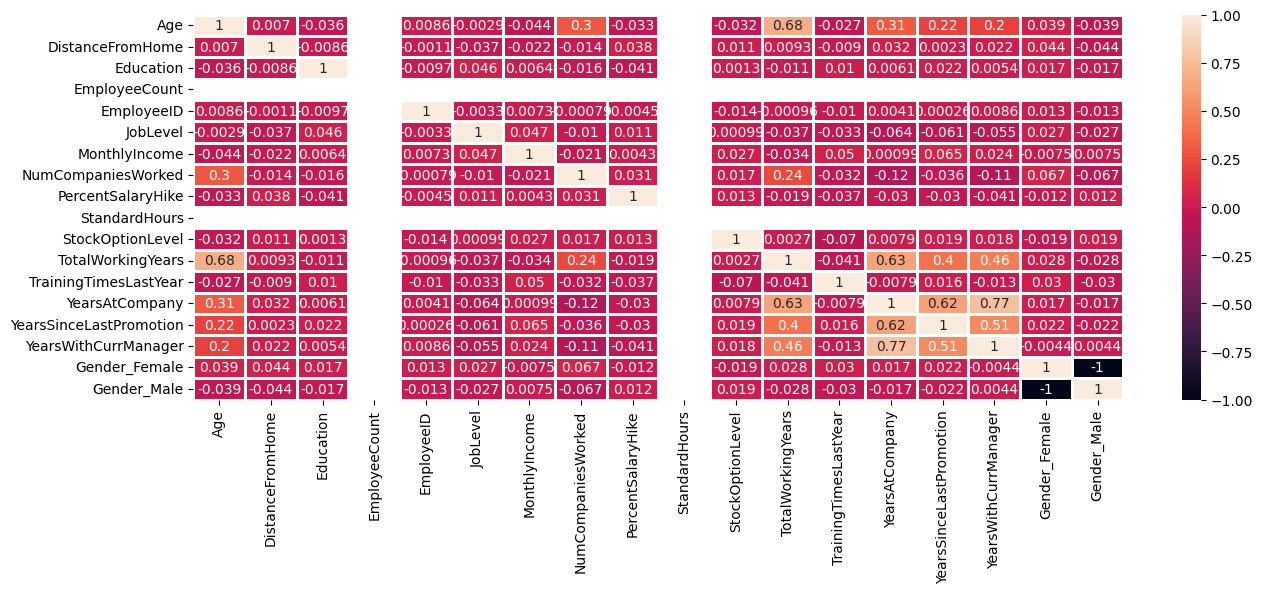

In [27]:

corr=general_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, linewidths=2, annot=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_3260\858301822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=general_data.corr()


<AxesSubplot: >

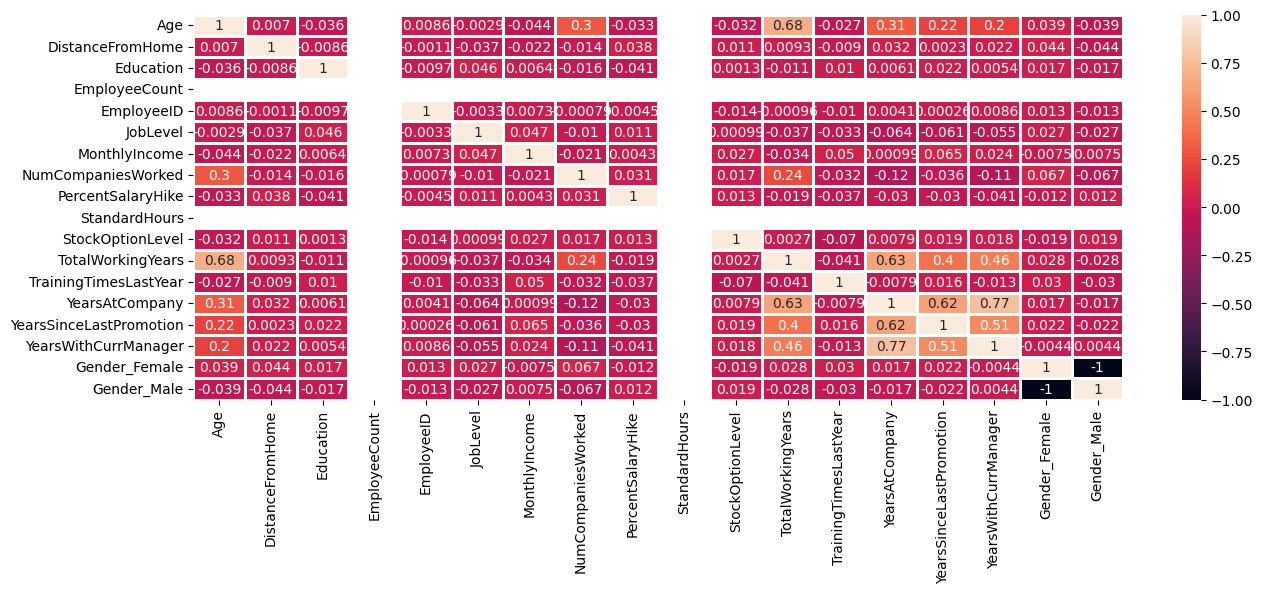

In [27]:

corr=general_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, linewidths=2, annot=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_3260\858301822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=general_data.corr()


<AxesSubplot: >

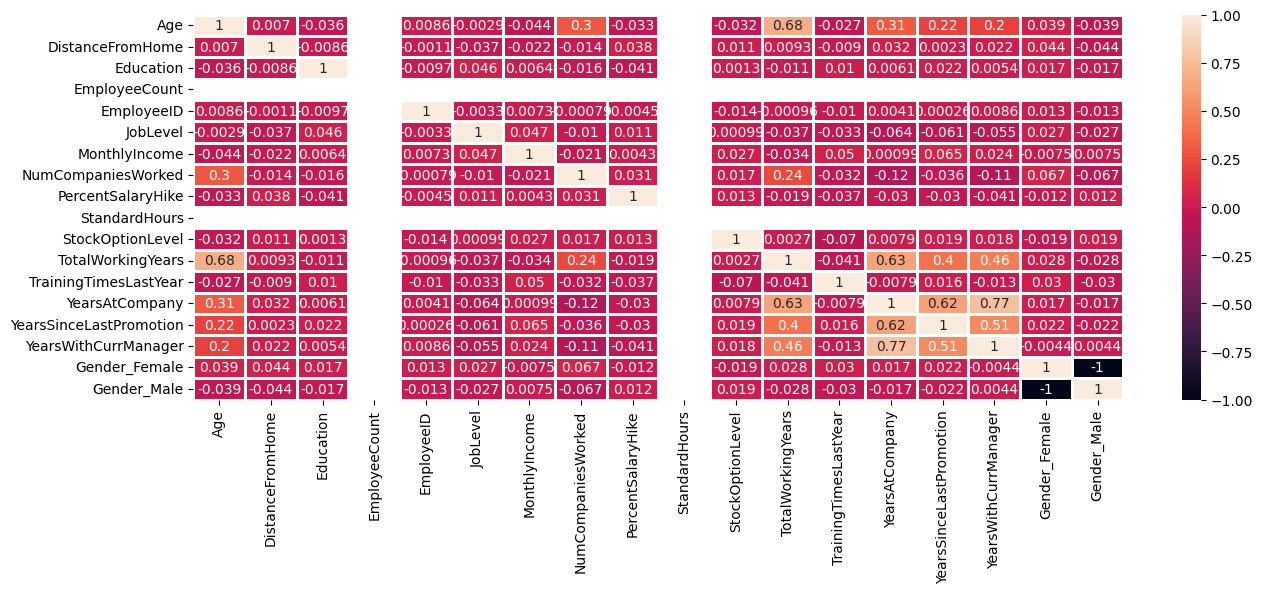

In [27]:

corr=general_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, linewidths=2, annot=True)
